# Formation Python - *Représentation graphique avec Matplotlib*

Ce cours est fortement inspiré par 

- le cours Matplotlib réalisé par Sylvain Faure lors d'une formation au laboratoire de mathématiques d'Orsay
- le tutoriel réalisé par Mike Müller lors d'une scipy lecture notes

matplotlib permet

- de réaliser des graphes 1D et 2D à la Matlab,
- d'interagir avec les graphes,
- de sauvegarder les figures sous différents formats (*pdf*, *ps*, *png*, ...),
- d'intégrer facilement ces graphes dans des interfaces graphiques utilisateur.

## Utilisation de matplotlib dans un notebook

In [1]:
%matplotlib inline

## pyplot et pylab

pyplot est le module de matplotlib qui contient toutes les fonctionnalités permettant de faire des graphes

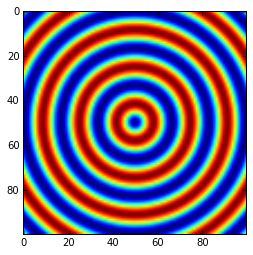

In [2]:
import matplotlib.pyplot as plt
import numpy as np

n = 100
x = np.linspace(-3*np.pi, 3*np.pi, n)
y = np.linspace(-3*np.pi, 3*np.pi, n)

x = x[np.newaxis, :]
y = y[:, np.newaxis]

plt.imshow(np.sin(np.sqrt(x**2 + y**2))**2)
plt.show()

pylab est un module matplotlib qui a pour but de recréer un environnement de type Matlab. Il contient donc de quoi faire des graphes et d'utiliser NumPy.

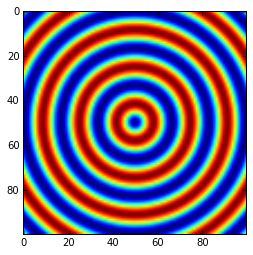

In [3]:
from pylab import *

n = 100
x = linspace(-3*pi, 3*pi, n)
y = linspace(-3*pi, 3*pi, n)

x = x[newaxis, :]
y = y[:, newaxis]

imshow(sin(sqrt(x**2 + y**2))**2)
plt.show()

## Notre modèle

Dans la suite, nous allons nous appuyer sur l'équation écrite en coordonnées polaires suivante

$$
r = e^{cos(a\theta)}-Acos(b\theta)+sin^B\left(\frac{\theta}{c}\right)
$$

où $\theta \in [0, 2R\pi]$ avec $R$ le nombre de révolutions.

La fonction Python s'écrit

In [4]:
def butterfly(theta, A, B, a, b, c):
    return np.exp(np.cos(a*theta)) - A*np.cos(b*theta) + np.sin(theta/c)**B

Nous prendrons les paramètres suivants

In [5]:
A = 2
B = 5
a = 1
b = 4
c = 30
R = 10
n = 10000
rotation = -np.pi/2

In [6]:
theta = np.linspace(0, R*2*np.pi, n)
r = butterfly(theta + rotation, A, B, a, b, c)

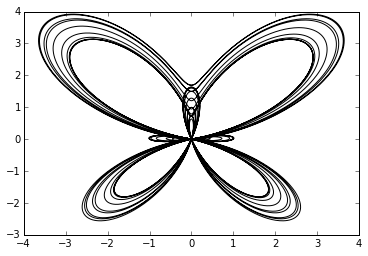

In [7]:
plt.plot(r*np.cos(theta), r*np.sin(theta), 'k')
plt.show()

On peut augmenter la taille de notre figure

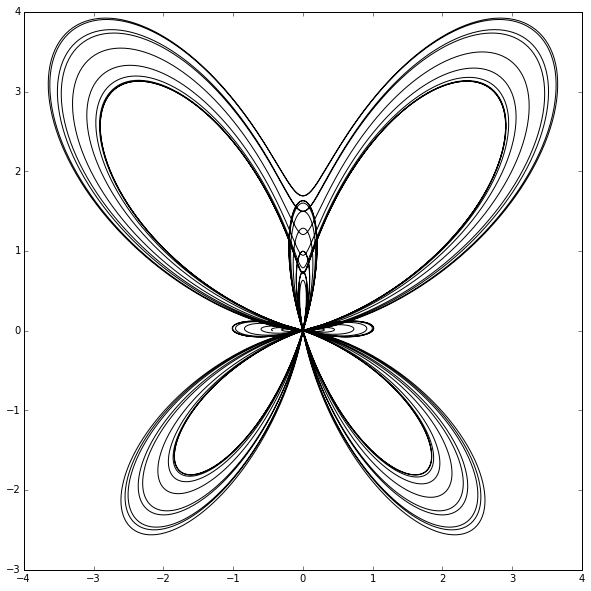

In [8]:
figsize = (10, 10)
fig = plt.figure(figsize=figsize)
plt.plot(r*np.cos(theta), r*np.sin(theta), 'k')
plt.show()

`figure` comporte d'autres arguments

- `num`: numéro de la figure
- `figsize`: taille de la figure
- `dpi`: résolution de la figure
- `facecolor`: la couleur de fond de la figure
- `edgecolor`: la couleur du bord de la figure

## Ajouter un titre et des labels

Il est possible de mettre du texte et des formules latex.

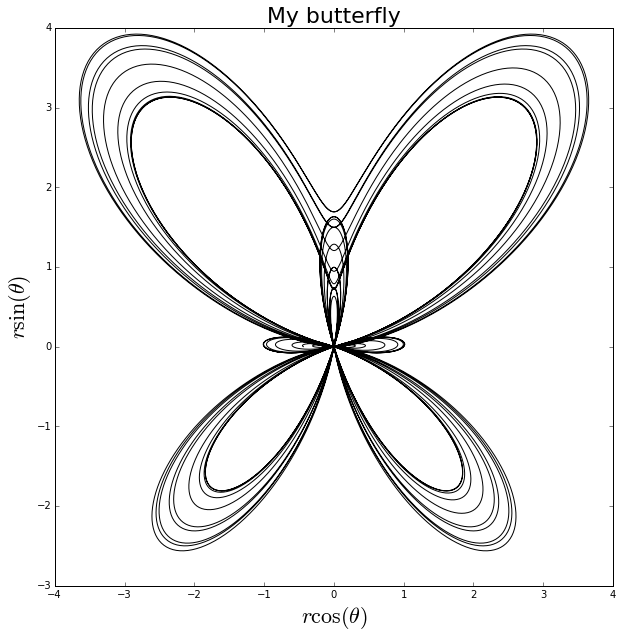

In [9]:
plt.figure(figsize=figsize)
plt.plot(r*np.cos(theta), r*np.sin(theta), 'k')

plt.title("My butterfly", fontsize = 22)

plt.xlabel("$r\cos(\\theta )$", fontsize = 22)
plt.ylabel("$r\sin(\\theta)$", fontsize = 22)
plt.show()

## Jouer avec les axes

Il est possible de définir les valeurs devant figurer sur l'axe ainsi que leur format en utilisant `xticks` ou `yticks`.

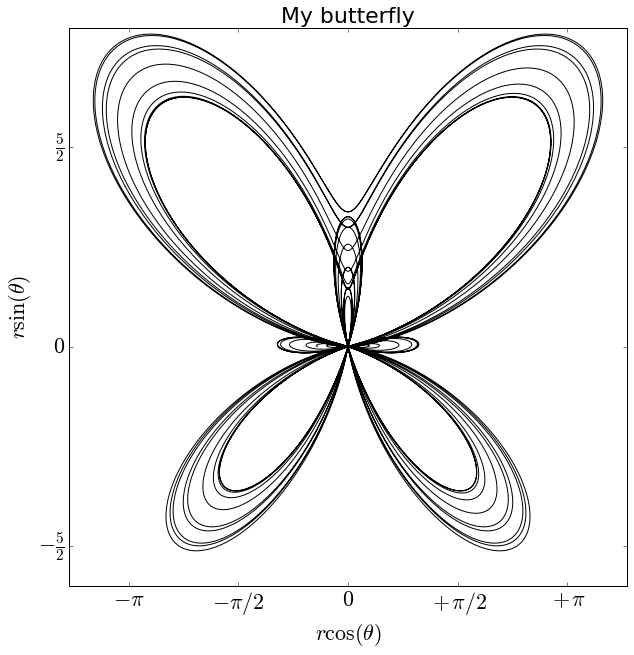

In [10]:
plt.figure(figsize=figsize)
plt.plot(r*np.cos(theta), r*np.sin(theta), 'k')

plt.title("My butterfly", fontsize = 22)

plt.xlabel("$r\cos(\\theta )$", fontsize = 22)
plt.ylabel("$r\sin(\\theta)$", fontsize = 22)

plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
          [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'], fontsize=22)
plt.yticks([-2.5, 0, 2.5],
          [r'$-\frac{5}{2}$', r'$0$', r'$\frac{5}{2}$'], fontsize=22)
plt.show()

Il est possible de modifier également les marqueurs des axes en spécifiant leur nombre, leur taille, leur couleur, ...

Il existe deux types de marqueurs

- `minor`: marqueurs sans label
- `major`: marqueurs avec label

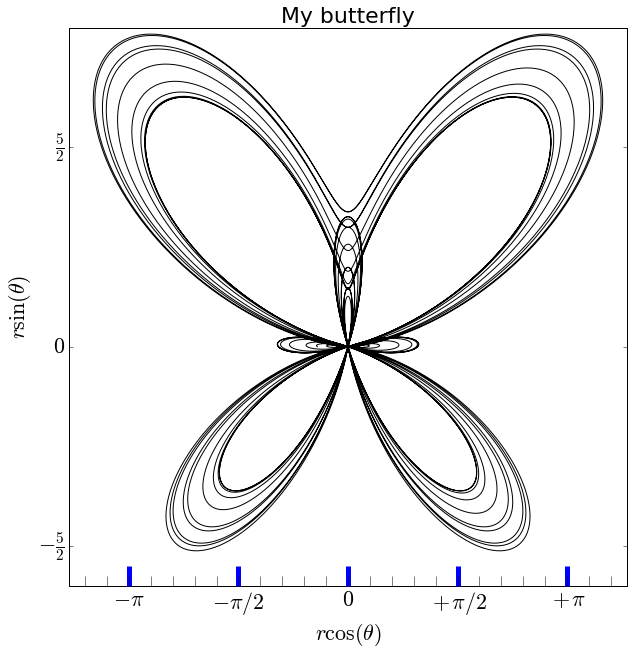

In [11]:
plt.figure(figsize=figsize)
plt.plot(r*np.cos(theta), r*np.sin(theta), 'k')

plt.title("My butterfly", fontsize = 22)

plt.xlabel("$r\cos(\\theta )$", fontsize = 22)
plt.ylabel("$r\sin(\\theta)$", fontsize = 22)


# on récupère l'axe
ax = plt.gca()
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi/10))

for tick in ax.xaxis.get_minor_ticks():
    tick.tick1line.set_markersize(10)    
    tick.tick2line.set_markersize(0)
    
for tick in ax.xaxis.get_major_ticks():
    tick.tick1line.set_markersize(20)
    tick.tick1line.set_markeredgewidth(5)
    tick.tick1line.set_markeredgecolor('b')
    tick.tick2line.set_markersize(0)


plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
          [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'], fontsize=22)
plt.yticks([-2.5, 0, 2.5],
          [r'$-\frac{5}{2}$', r'$0$', r'$\frac{5}{2}$'], fontsize=22)
plt.show()

On a différentes fonctions nous permettant de spécifier l'emplacement des marqueurs

<img src="files/figures/plot_ticks_1.png" style="width:80%;" />

On peut également avoir besoin de déplacer les axes.

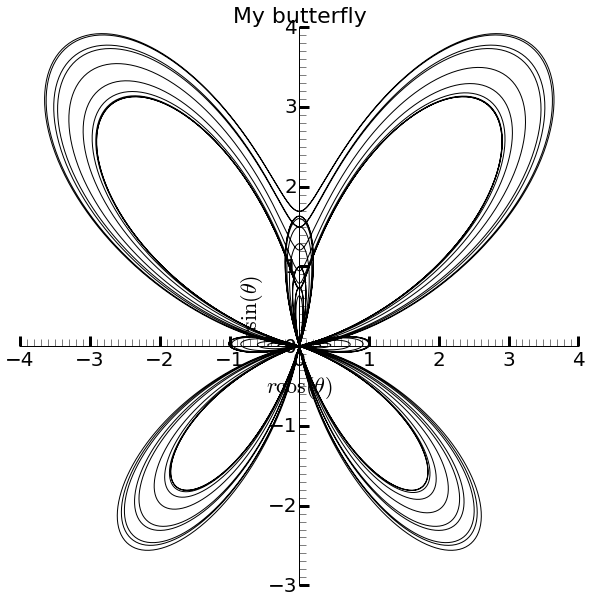

In [12]:
plt.figure(figsize=figsize)
plt.plot(r*np.cos(theta), r*np.sin(theta), 'k')

plt.title("My butterfly", fontsize = 22)

plt.xlabel("$r\cos(\\theta )$", fontsize = 22)
plt.ylabel("$r\sin(\\theta)$", fontsize = 22)


# on récupère l'axe
ax = plt.gca()
# on enlève les axes de droite et du haut
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# on met nos marqueurs sur l'axe du bas et celui de gauche
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# on définit leur position par rapport aux données
ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data', 0))

ax.yaxis.set_minor_locator(plt.MultipleLocator(.1))
ax.yaxis.set_major_locator(plt.MultipleLocator(1.))

for axis in [ax.xaxis, ax.yaxis]:
    axis.set_minor_locator(plt.MultipleLocator(.1))
    axis.set_major_locator(plt.MultipleLocator(1.))
    for tick in axis.get_minor_ticks():
        tick.tick1line.set_markersize(7)    
    
    for tick in axis.get_major_ticks():
        tick.tick1line.set_markersize(10)
        tick.tick1line.set_markeredgewidth(3)
        tick.label1.set_fontsize(20)

plt.show()

## Colorier une partie de la figure

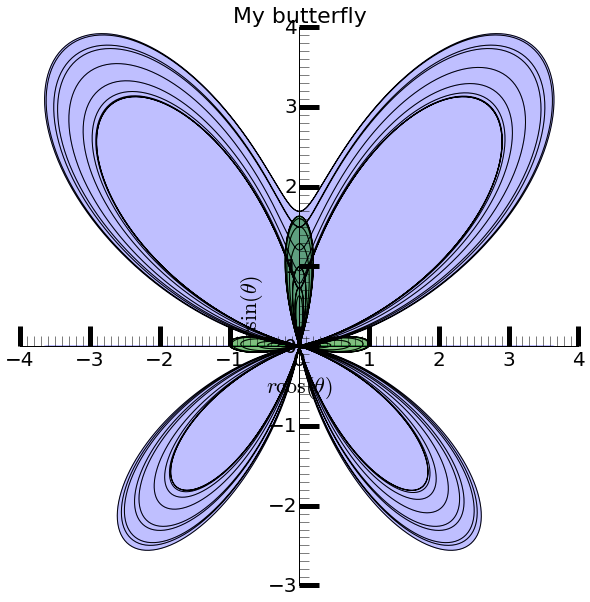

In [13]:
plt.figure(figsize=figsize)
plt.plot(r*np.cos(theta), r*np.sin(theta), 'k')

plt.title("My butterfly", fontsize = 22)

plt.xlabel("$r\cos(\\theta )$", fontsize = 22)
plt.ylabel("$r\sin(\\theta)$", fontsize = 22)

ind = np.where(r>0)
plt.fill_between(r[ind]*np.cos(theta[ind]), r[ind]*np.sin(theta[ind]), color='b', alpha=.25)
ind = np.where(r<0)
plt.fill_between(r[ind]*np.cos(theta[ind]), r[ind]*np.sin(theta[ind]), color='g', alpha=.5)

# on récupère l'axe
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))

ax.xaxis.set_minor_locator(plt.MultipleLocator(.1))
ax.xaxis.set_major_locator(plt.MultipleLocator(1.))
ax.yaxis.set_minor_locator(plt.MultipleLocator(.1))
ax.yaxis.set_major_locator(plt.MultipleLocator(1.))

for axis in [ax.xaxis, ax.yaxis]:
    for tick in axis.get_minor_ticks():
        tick.tick1line.set_markersize(10)    
        tick.tick2line.set_markersize(0)
    
    for tick in axis.get_major_ticks():
        tick.tick1line.set_markersize(20)
        tick.tick1line.set_markeredgewidth(5)
        tick.tick2line.set_markersize(0)
        tick.label1.set_fontsize(20)

plt.show()

## Annotations

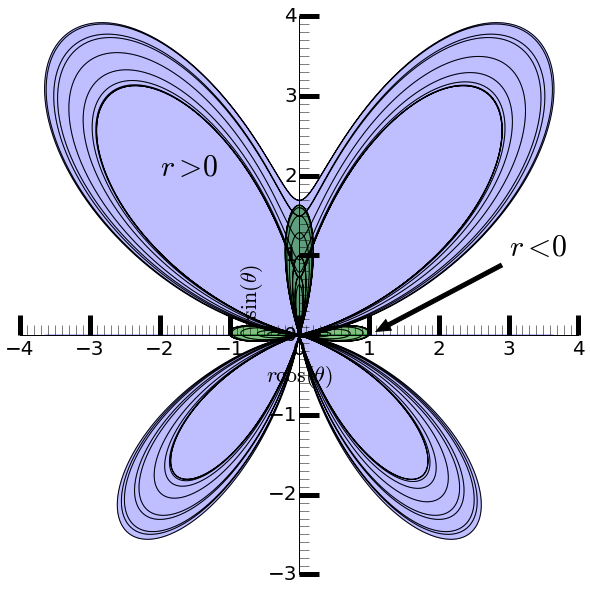

In [14]:
plt.figure(figsize=figsize)
plt.plot(r*np.cos(theta), r*np.sin(theta), 'k')

plt.xlabel("$r\cos(\\theta )$", fontsize = 22)
plt.ylabel("$r\sin(\\theta)$", fontsize = 22)

ind = np.where(r>0)
plt.fill_between(r[ind]*np.cos(theta[ind]), r[ind]*np.sin(theta[ind]), color='b', alpha=.25)
ind = np.where(r<0)
plt.fill_between(r[ind]*np.cos(theta[ind]), r[ind]*np.sin(theta[ind]), color='g', alpha=.5)

plt.text(-2, 2., '$r>0$', fontsize=30)

plt.annotate('$r<0$', xy = (1, 0), xytext = (3, 1), arrowprops=
             dict(facecolor = 'black', shrink = 0.05), fontsize=30)

# on récupère l'axe
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))

ax.xaxis.set_minor_locator(plt.MultipleLocator(.1))
ax.xaxis.set_major_locator(plt.MultipleLocator(1.))
ax.yaxis.set_minor_locator(plt.MultipleLocator(.1))
ax.yaxis.set_major_locator(plt.MultipleLocator(1.))

for axis in [ax.xaxis, ax.yaxis]:
    for tick in axis.get_minor_ticks():
        tick.tick1line.set_markersize(10)    
        tick.tick2line.set_markersize(0)
    
    for tick in axis.get_major_ticks():
        tick.tick1line.set_markersize(20)
        tick.tick1line.set_markeredgewidth(5)
        tick.tick2line.set_markersize(0)
        tick.label1.set_fontsize(20)
        
plt.show()

## subplot et axes

Il n'est pas rare d'avoir besoin d'afficher plusieurs figures indépendantes sur une même figure.
`matplotlib` offre deux façons de faire: `subplot` ou `axes`.

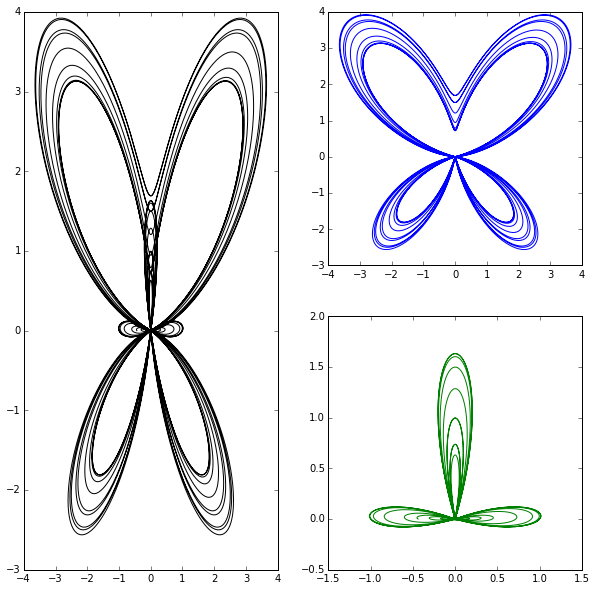

In [15]:
plt.figure(figsize=(10, 10))
plt.subplot(1,2,1)
plt.plot(r*np.cos(theta), r*np.sin(theta), 'k')

plt.subplot(2,2,2)
ind = np.where(r>0)
plt.plot(r[ind]*np.cos(theta[ind]), r[ind]*np.sin(theta[ind]), color='b')

plt.subplot(2,2,4)
ind = np.where(r<0)
plt.plot(r[ind]*np.cos(theta[ind]), r[ind]*np.sin(theta[ind]), color='g')
plt.show()

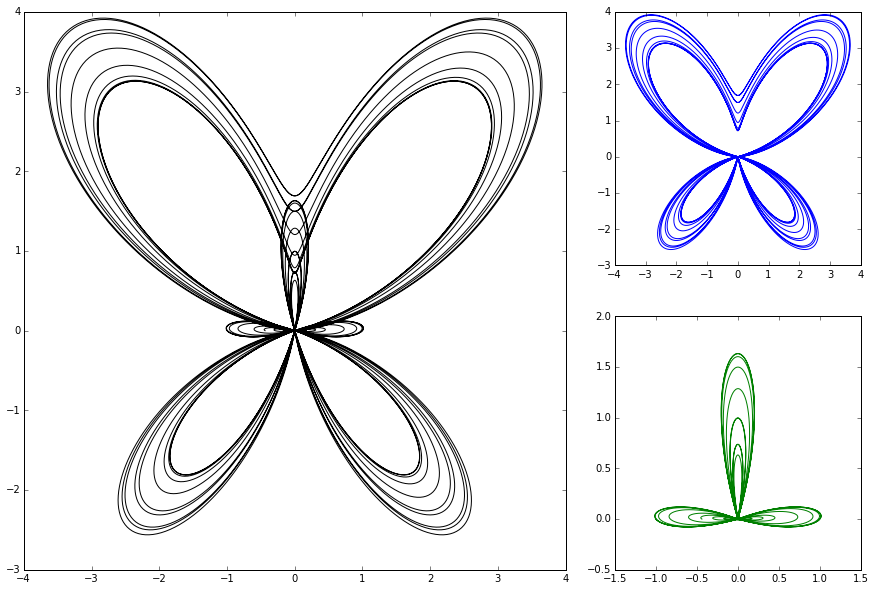

In [16]:
import matplotlib.gridspec as gridspec

plt.figure(figsize=(15, 10))
G = gridspec.GridSpec(2, 3)

plt.subplot(G[:, :2])
plt.plot(r*np.cos(theta), r*np.sin(theta), 'k')

plt.subplot(G[0, 2])
ind = np.where(r>0)
plt.plot(r[ind]*np.cos(theta[ind]), r[ind]*np.sin(theta[ind]), color='b')

plt.subplot(G[1, 2])
ind = np.where(r<0)
plt.plot(r[ind]*np.cos(theta[ind]), r[ind]*np.sin(theta[ind]), color='g')
plt.show()

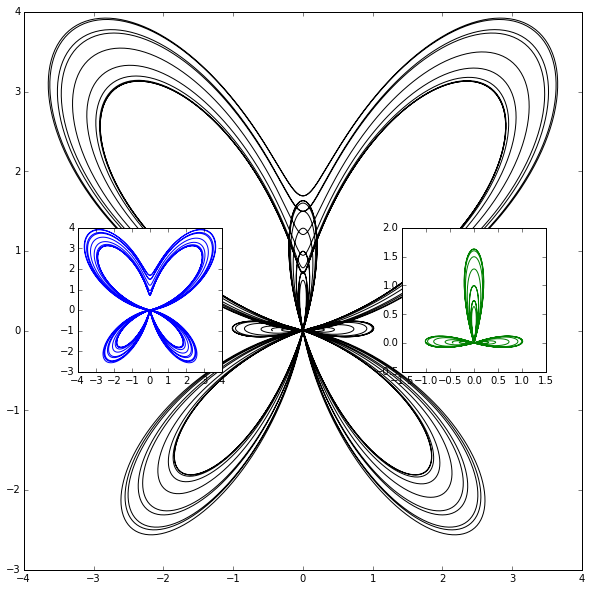

In [17]:
plt.figure(figsize=figsize)

plt.plot(r*np.cos(theta), r*np.sin(theta), 'k')

plt.axes([.2, .4, .2, .2])
ind = np.where(r>0)
plt.plot(r[ind]*np.cos(theta[ind]), r[ind]*np.sin(theta[ind]), color='b')

plt.axes([.65, .4, .2, .2])
ind = np.where(r<0)
plt.plot(r[ind]*np.cos(theta[ind]), r[ind]*np.sin(theta[ind]), color='g')
plt.show()

## Ajouter une légende

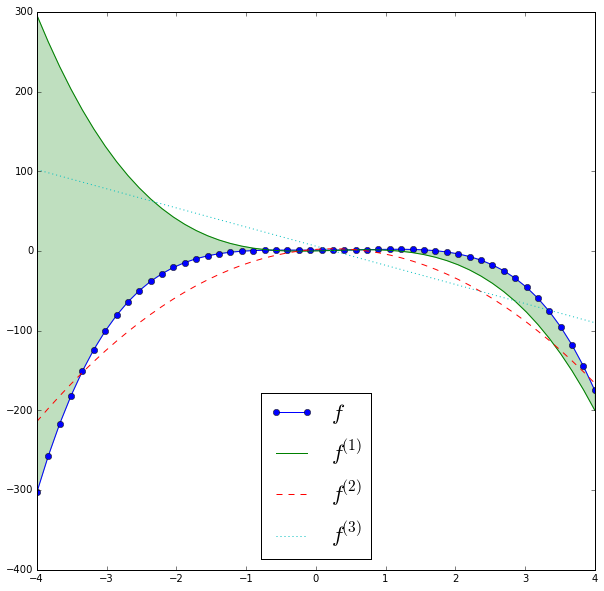

In [18]:
x = np.linspace(-4., 4., 50)

plt.figure(figsize=figsize)
plt.hold(True)
plt.plot(x, -x**4 + x**3 + x**2 + 1, 'o-')
plt.plot(x, -4*x**3 + 3*x**2 + 2*x, '-')
plt.plot(x, -12*x**2 + 6*x + 2, '--')
plt.plot(x, -24*x + 6, ':')
plt.fill_between(x, -x**4 + x**3 + x**2 + 1, -4*x**3 + 3*x**2 + 2*x, color='g', alpha=.25)
plt.hold(False)
plt.legend(['$f$', '$f^{(1)}$', '$f^{(2)}$'
           , '$f^{(3)}$'], loc='lower center', fontsize=22)
plt.savefig('1D_legende.pdf')
plt.show()

## Autres figures

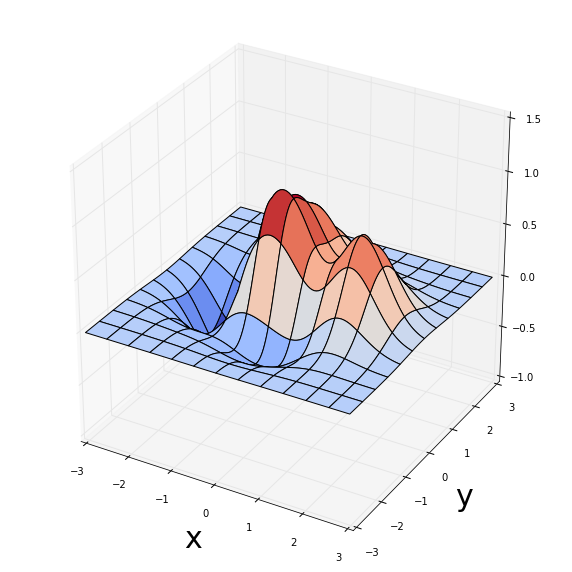

In [19]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

def f(x,y):
    return (1- x/2 + x**5 + y**3)*np.exp(-x**2-y**2)

dx, dy = 0.05, 0.05
x = np.arange(-3.0, 3.0, dx)
y = np.arange(-3.0, 3.0, dy)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure(figsize=figsize)
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)
ax.set_xlabel('x', fontsize=30)
ax.set_ylabel('y', fontsize=30)
plt.show()

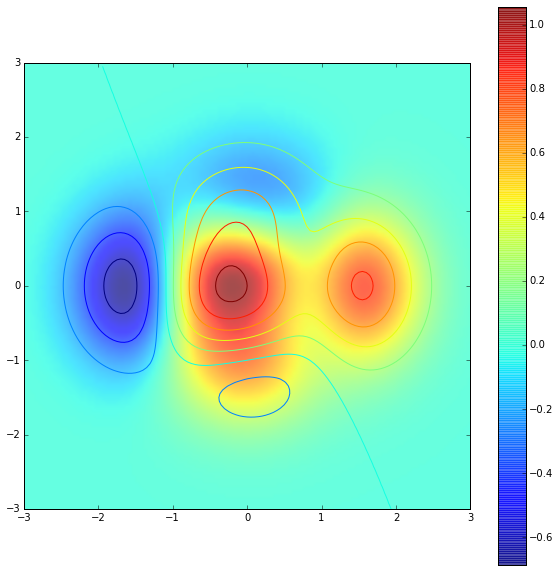

In [20]:
fig = plt.figure(figsize=figsize)
plt.hold(True)
c = plt.contour(X, Y, Z, 10)
im = plt.imshow(Z, extent=(-3,3,-3,3))
im.set_alpha(0.7)
plt.hold(False)
plt.colorbar()
plt.savefig('2D_contour.pdf')

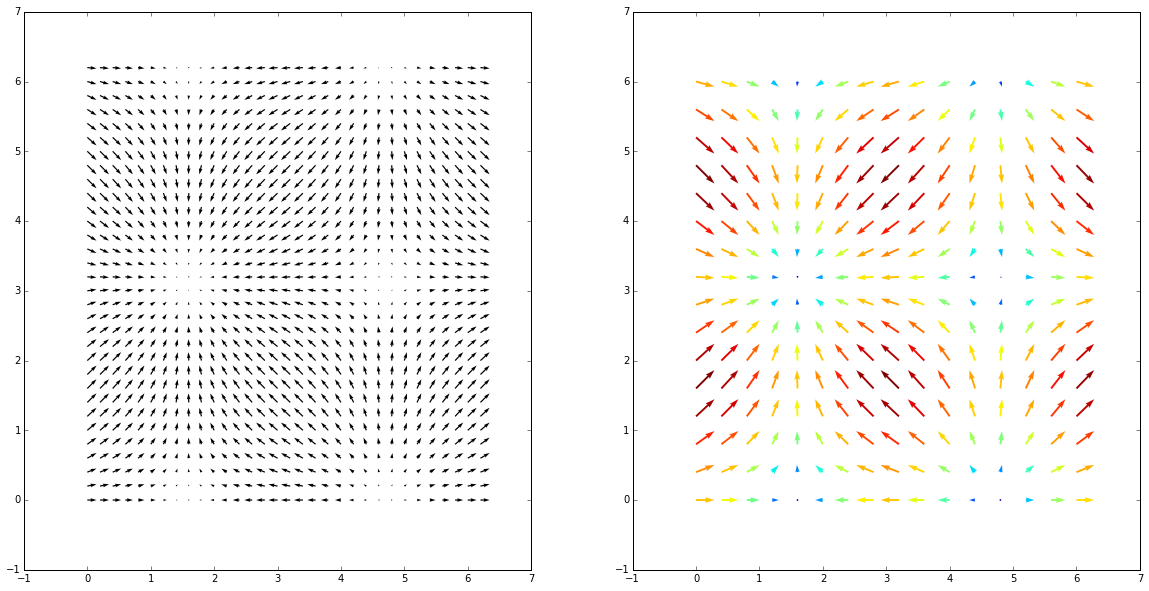

In [21]:
X,Y = np.meshgrid( np.arange(0,2*np.pi,.2),
                   np.arange(0,2*np.pi,.2) )
U = np.cos(X)
V = np.sin(Y)
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.quiver( X, Y, U, V)
plt.axis([-1, 7, -1, 7])

plt.subplot(1, 2, 2)
C = np.sqrt(U**2 + V**2)
N=2
plt.quiver( X[::N, ::N], Y[::N, ::N], U[::N, ::N], 
            V[::N, ::N], C[::N, ::N])
plt.axis([-1, 7, -1, 7])
plt.show()

## Animations

Il est également possible de faire des films rapidement en donnant la fonction qui fait la mise à jour, en spécifiant le nombre de frames par seconde, ...

<IPython.core.display.Javascript object>


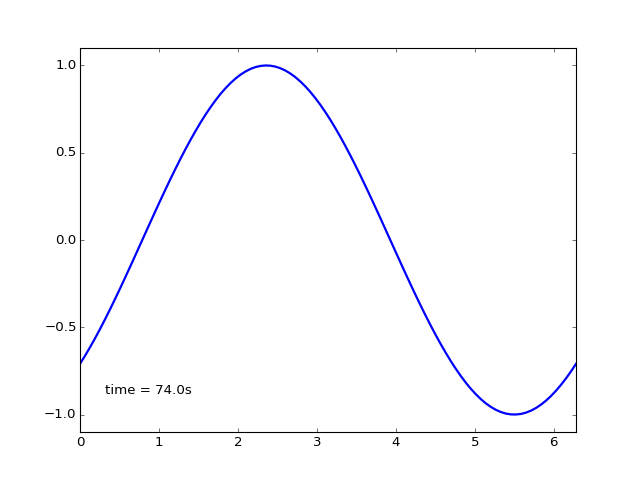

In [2]:
%matplotlib nbagg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(0, 2.*np.pi), ylim=(-1.1, 1.1))

theta = np.linspace(0, 2*np.pi, 100)

# Creation des différents elements constituants la figure
sinplot = plt.Line2D([], [], lw=2)
ax.add_line(sinplot)

time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.1, '', transform=ax.transAxes)

def init():
    sinplot.set_data([], [])    
    time_text.set_text('')
    return sinplot, time_text

def animate(i):
    sinplot.set_data(theta, np.sin(theta+i/(2*np.pi)))
    time_text.set_text(time_template%(i))
    return sinplot, #time_text

anim = animation.FuncAnimation(fig, animate, np.arange(1, 100),
    interval=25, blit=True, init_func=init)

plt.show()

## Pour aller plus loin

N'hésitez pas à aller voir la galerie sur le site de matplotlib donnant un bon nombre d'exemples

http://matplotlib.org/gallery.html

In [1]:
# execute this part to modify the css style
from IPython.core.display import HTML
def css_styling():
    styles = open("../../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()